In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('../input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
df.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

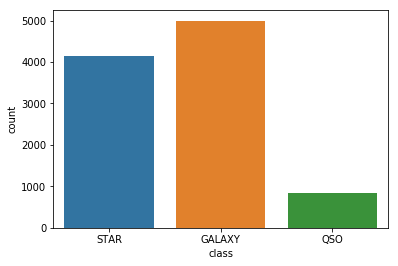

In [7]:
sns.countplot(df['class'])

In [8]:
df['class'].replace(('STAR','GALAXY','QSO'),(0,1,2),inplace=True)

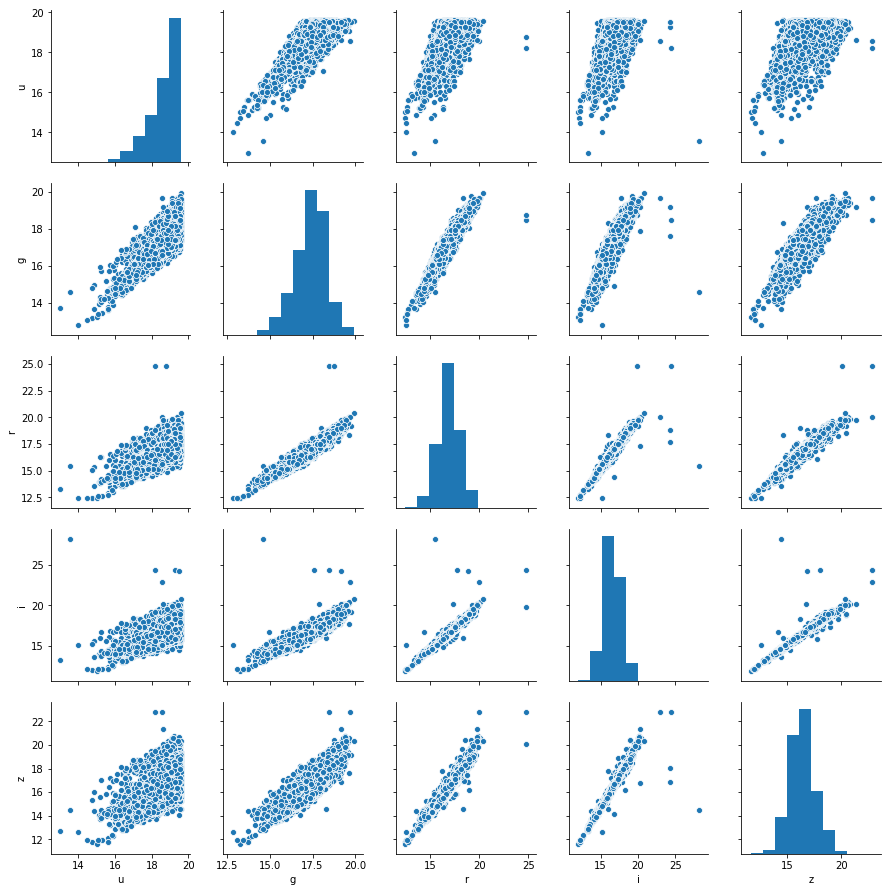

In [9]:
sns.pairplot(df[['u','g','r','i','z']])

In [10]:
df.drop(['objid','specobjid'],axis=1,inplace=True)
print("Data shape:", df.shape)

Data shape: (10000, 16)


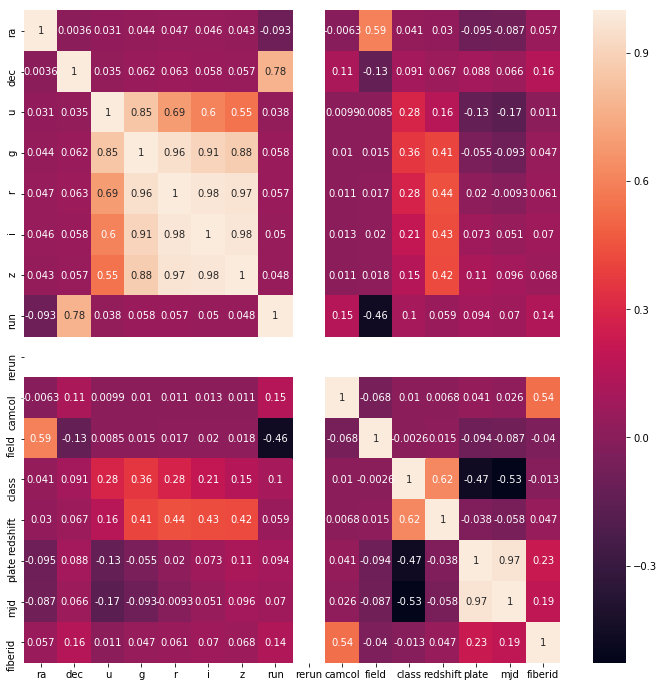

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr().astype(float),annot=True)

In [12]:
X = df.drop(['class'],axis=1)
y = df['class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN

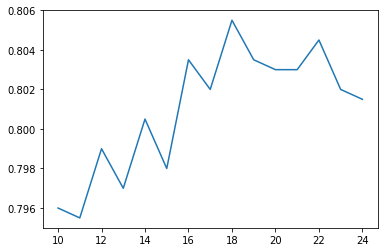

In [14]:
knn_accuracy = []

for k in range(10,25):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    knn_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(range(10,25),knn_accuracy)
plt.show()

print("KNN optimal neighbors", np.argmax(knn_accuracy)+10)

## Random search svc

In [15]:
kernel = ['rbf']
C = [0.1,1,10,100]
gamma = [0.001,0.01,1]

param_grid = {'kernel':kernel,
              'C':C,
              'gamma':gamma}

print("SVC param grid: ", param_grid)

SVC param grid:  {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 1]}


In [16]:
svc = SVC()
random_svc = RandomizedSearchCV(svc, param_distributions=param_grid, random_state=42,n_jobs=-1)
random_svc.fit(X_train, y_train)
print("Best parameters:", random_svc.best_params_)
print("Best score:", random_svc.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
Best score: 0.709375


In [17]:
random_svc.score(X_test, y_test)

0.73

## Random forest 

In [18]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=11)]
max_features = ['auto','sqrt']
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(start=10, stop = 100, num=11)]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'max_depth': max_depth}

print("Param grid for Random forest classifier:", param_grid)

Param grid for Random forest classifier: {'n_estimators': [10, 109, 208, 307, 406, 505, 604, 703, 802, 901, 1000], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100]}


In [19]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                               random_state=42,n_jobs=-1)
rf_random.fit(X_train, y_train)
print("Random forest best parameters:", rf_random.best_params_)
print("Random forest best score:", rf_random.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Random forest best parameters: {'n_estimators': 604, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Random forest best score: 0.988125


In [20]:
rf_random.score(X_test, y_test)

0.9925

## XGB classifier

In [21]:
param_grid = {
            'min_child_weight': [1, 5, 10,20],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5, 6, 7]
            }


xgb = XGBClassifier()
random_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid,
                                n_jobs=-1,random_state=42)
random_xgb.fit(X_train,y_train)

print("XGB best parameters:", random_xgb.best_params_)
print("XGB best score:", random_xgb.best_score_)

print("Accuracy on test set:", random_xgb.score(X_test, y_test))


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


XGB best parameters: {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}
XGB best score: 0.989625
Accuracy on test set: 0.9935
